# Combine _roads.tsv and BMMS-overview.xlsx

In [2]:
import pandas as pd

In [37]:
# import data
dir = '../infrastructure/original/'
filename = 'Roads_InfoAboutEachLRP.csv'
df_roadinfo = pd.read_csv(dir + filename)

In [38]:
# import data
dir = '../infrastructure/original/'
filename = 'BMMS_overview.xlsx'
df_overview = pd.read_excel(dir + filename)

In [39]:
# import roads_transposed.csv
dir = '../'
filename = 'roads_transposed.csv'
df_roadstransposed = pd.read_csv(dir + filename)

In [40]:
# print shapes of dataframes
print(df_roadinfo.shape)
print(df_overview.shape)
print(df_roadstransposed.shape)

(52210, 7)
(21407, 20)
(52210, 4)


In [41]:
df_overview.shape[0] + df_roadstransposed.shape[0]

73617

In [42]:
df_roads_bridges_combined = df_roadstransposed.copy()

In [43]:
# Select the relevant columns from df_overview
new_rows = df_overview[['road', 'LRPName', 'lat', 'lon']]

# Rename the columns to match df_roads_bridges_combined
new_rows.columns = ['road', 'lrp', 'lat', 'lon']

# Add the 'source' column and fill it with the name of the dataframe
new_rows['source'] = 'df_overview'

# Append the new rows to df_roads_bridges_combined using concat
df_roads_bridges_combined = pd.concat([df_roads_bridges_combined, new_rows], ignore_index=True)

# Include all duplicates
duplicates = df_roads_bridges_combined[df_roads_bridges_combined.duplicated(keep=False)]

# Display the updated dataframe with duplicates
print(duplicates)

        road      lrp        lat        lon       source
102       N1  LRP038b  23.531388  90.715361          NaN
103       N1  LRP038b  23.531388  90.715361          NaN
319       N1  LRP141a  23.068860  91.360722          NaN
320       N1  LRP141a  23.068860  91.360722          NaN
369       N1  LRP168b  22.913806  91.526860          NaN
...      ...      ...        ...        ...          ...
72587   N106  LRP034e  22.546500  91.987556  df_overview
72588   N106  LRP034e  22.546500  91.987556  df_overview
72833   N804  LRP005b  23.434722  89.956111  df_overview
73162  Z3030  LRP006a  24.393750  90.332833  df_overview
73530  Z8004  LRP006a  23.550417  90.429388  df_overview

[697 rows x 5 columns]


C:\Users\Move\AppData\Local\Temp\ipykernel_15640\1200191369.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['source'] = 'df_overview'


In [45]:
# sort the dataframe by road and LRP
df_roads_bridges_combined = df_roads_bridges_combined.sort_values(by=['road', 'lrp'])

In [46]:
# export df_roads_bridges_combined to a csv file
df_roads_bridges_combined.to_csv('df_roads_bridges_combined.csv', index=False)

In [51]:
def plot_road_comparison(df_original, df_corrected, road):
    fig, axes = plt.subplots(1, 2, figsize=(15, 7))
    
    # Plot original road
    df_road_original = df_original[df_original['road'] == road]
    axes[0].scatter(df_road_original['lon'], df_road_original['lat'], color='y', alpha=0.5, label='lrp')
    axes[0].plot(df_road_original['lon'], df_road_original['lat'], color='k', alpha=1, linewidth=1, label='road')
    axes[0].set_title(f'{road} - Original')
    axes[0].set_xlabel('Longitude')
    axes[0].set_ylabel('Latitude')
    axes[0].legend()
    
    # Plot corrected road
    df_road_corrected = df_corrected[df_corrected['road'] == road]
    for _, row in df_road_corrected.iterrows():
        color = 'r' if row['source'] == 'df_overview' else 'y'
        axes[1].scatter(row['lon'], row['lat'], color=color, alpha=0.5, label='lrp' if color == 'r' else '')
    #axes[1].plot(df_road_corrected['lon'], df_road_corrected['lat'], color='k', alpha=1, linewidth=1, label='road')
    axes[1].set_title(f'{road} - Interpolated')
    axes[1].set_xlabel('Longitude')
    axes[1].set_ylabel('Latitude')
    #axes[1].legend()
    
    plt.tight_layout()
    plt.show()

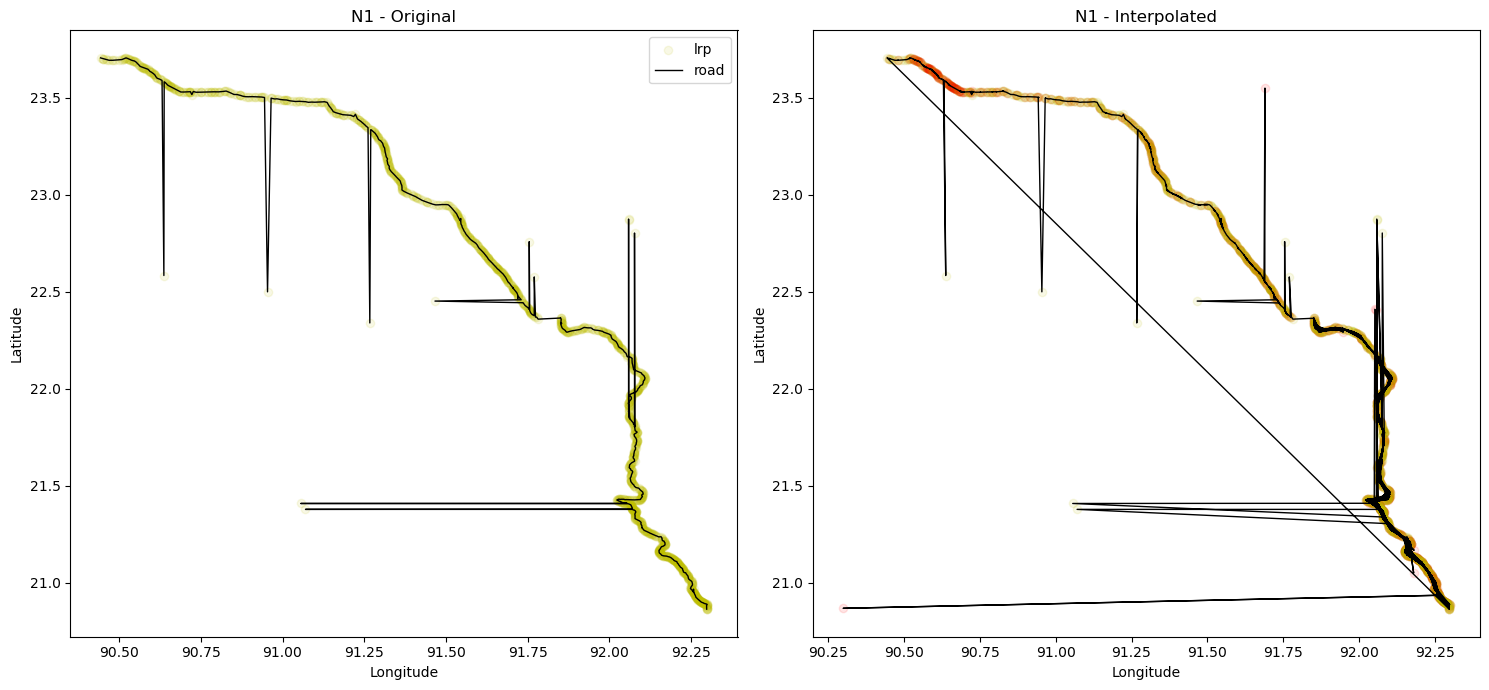

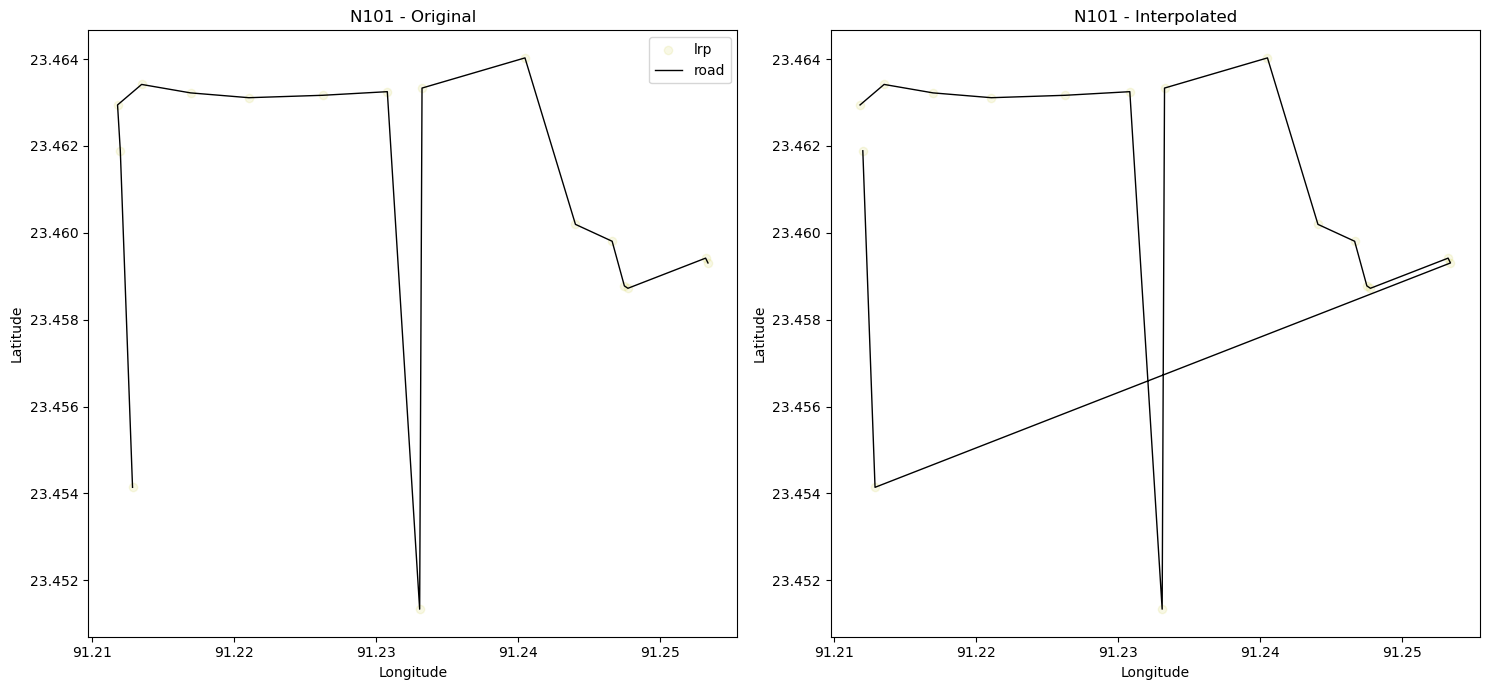

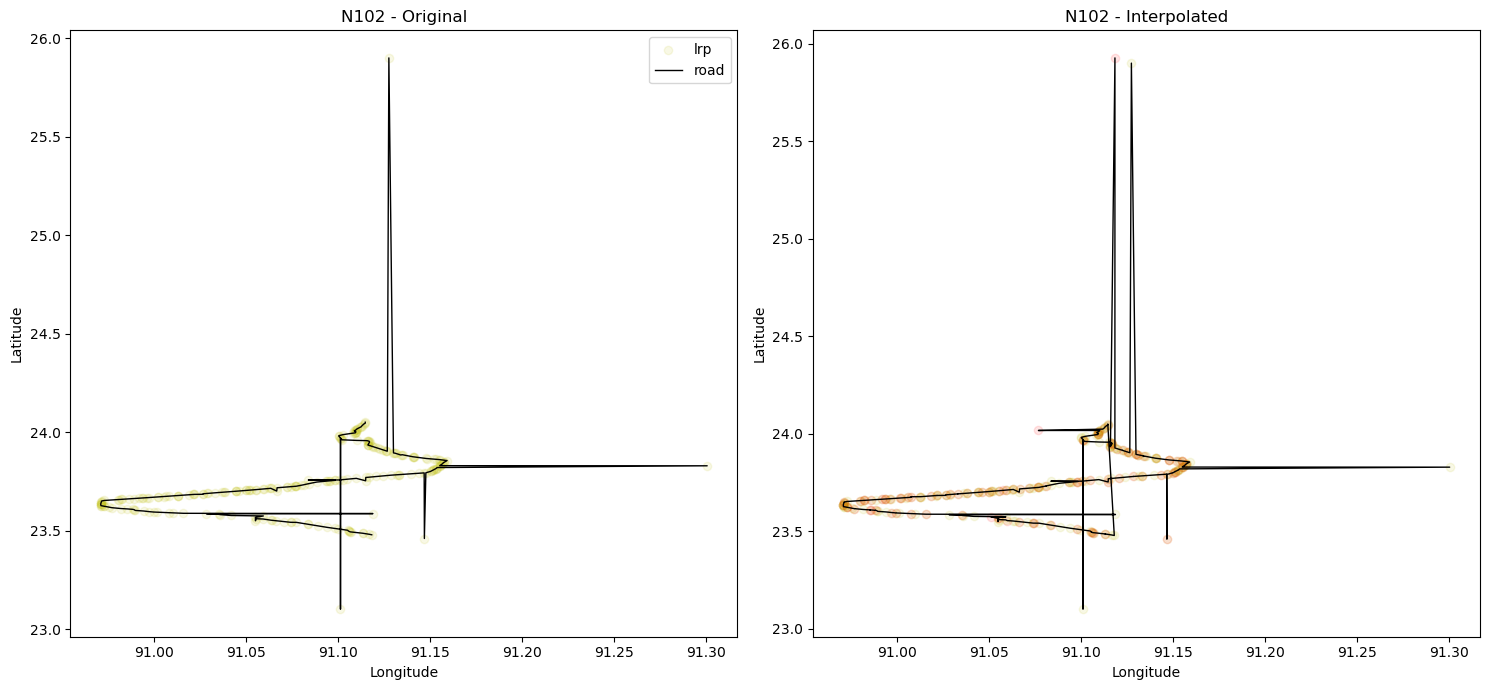

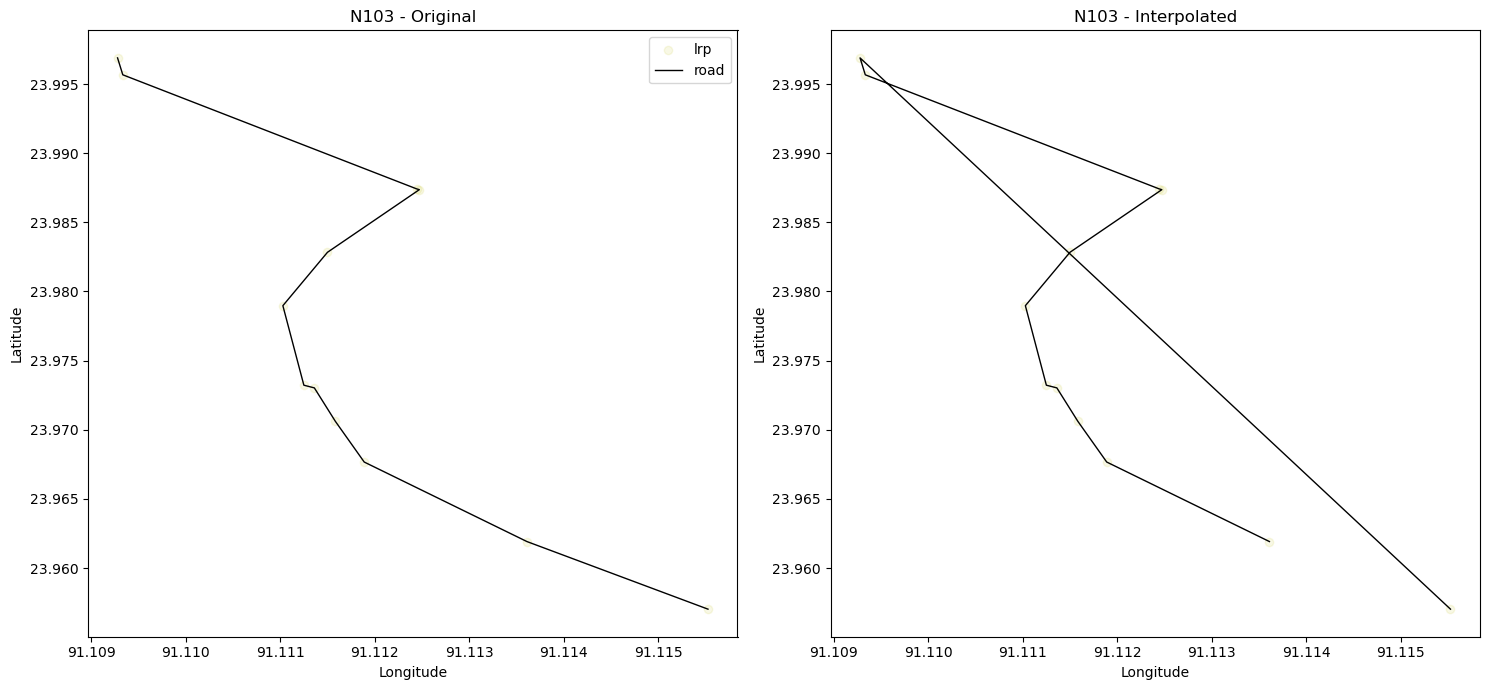

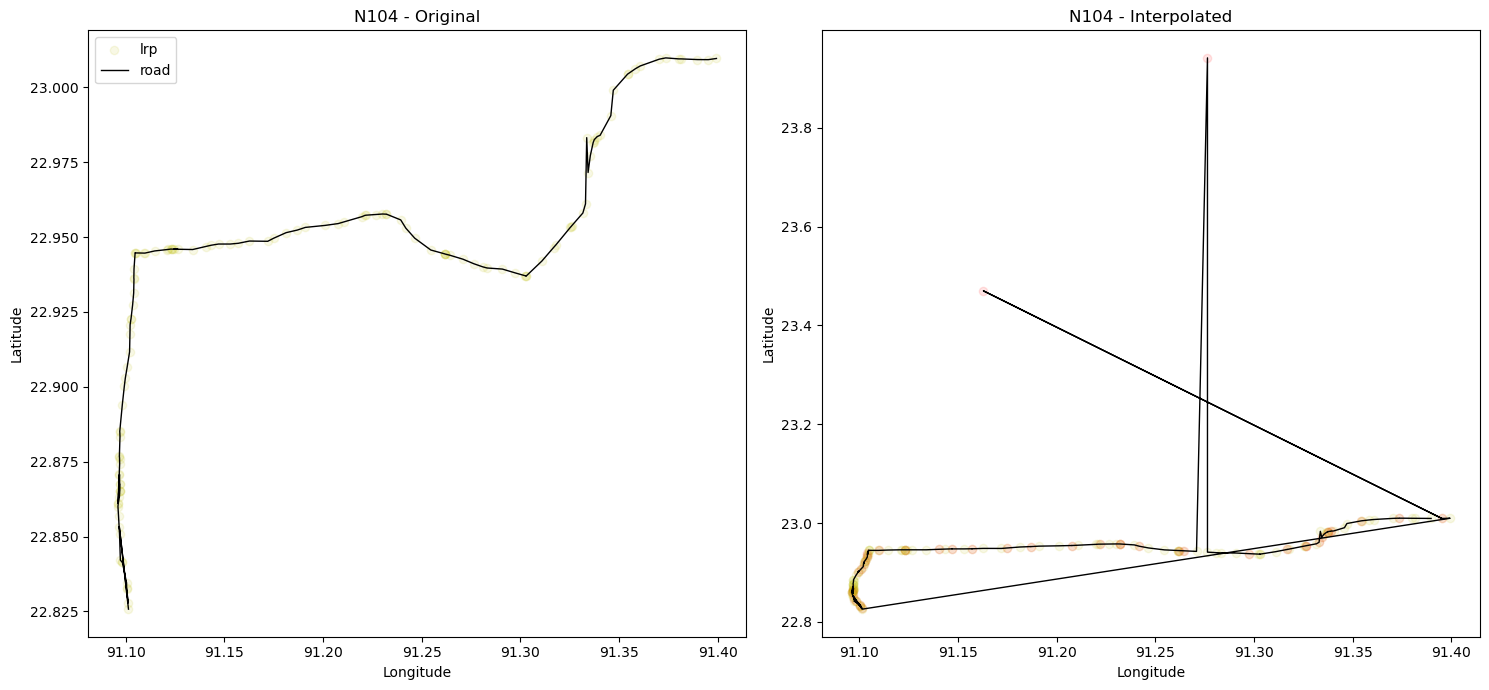

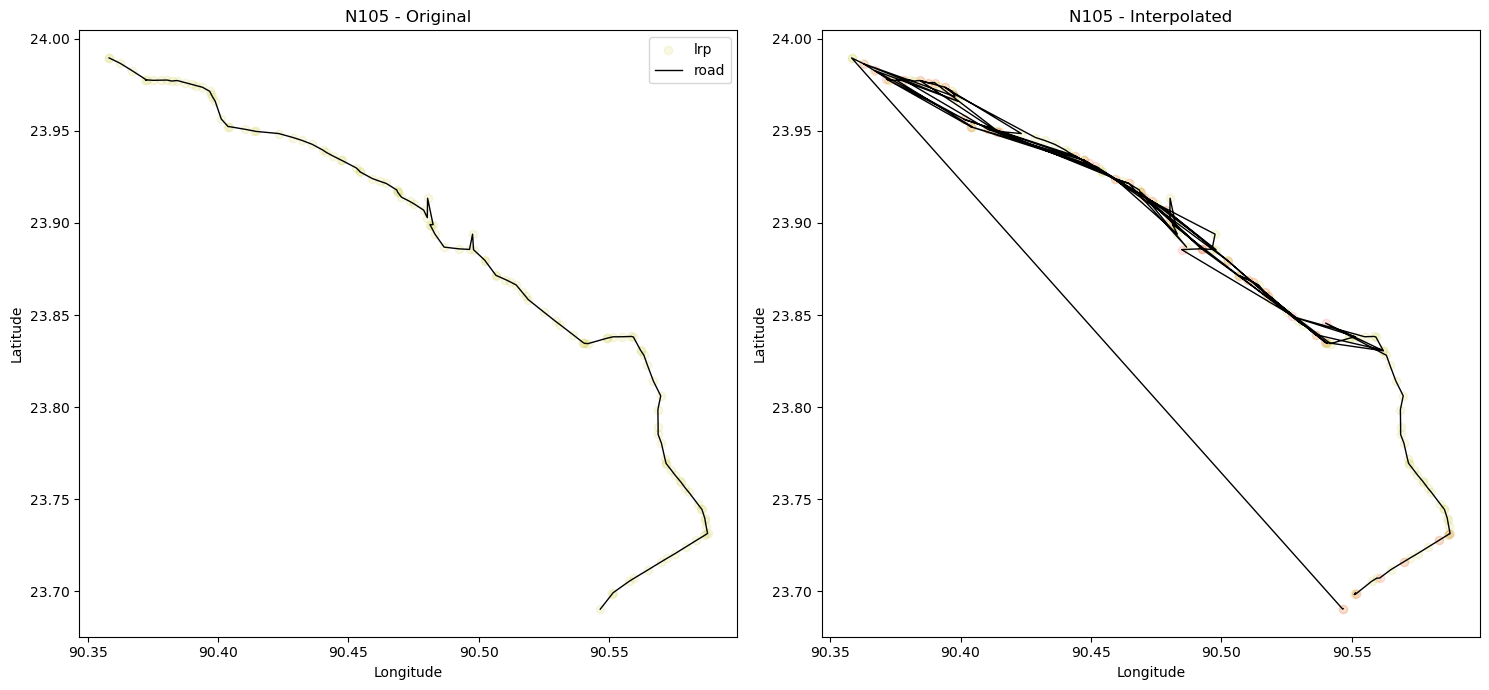

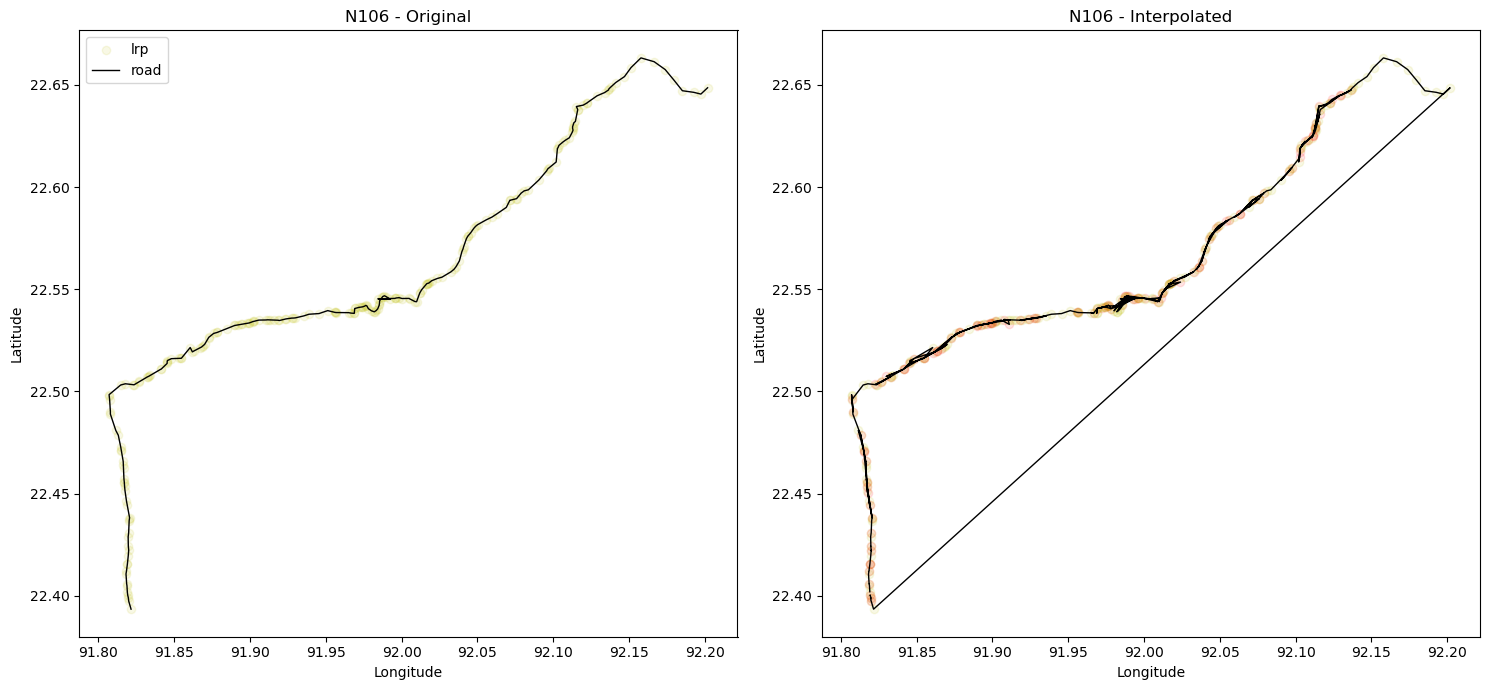

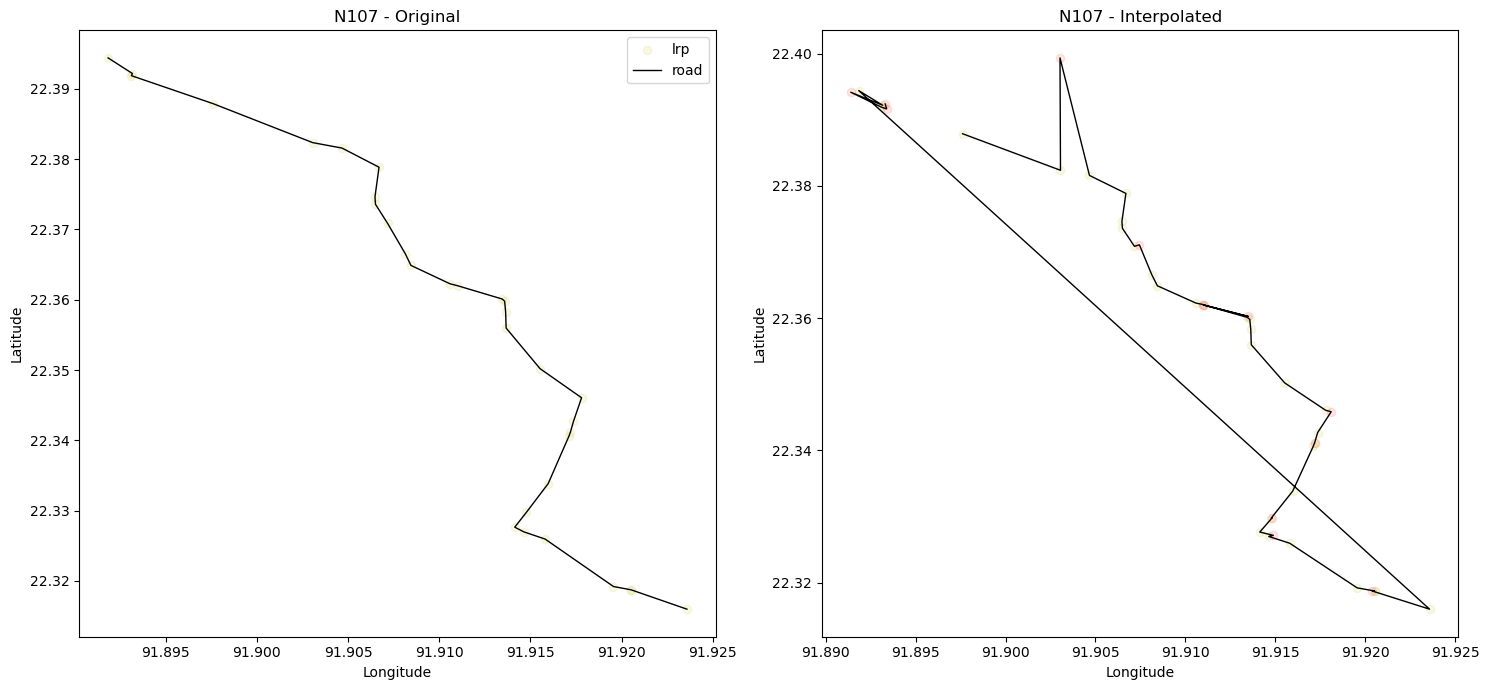

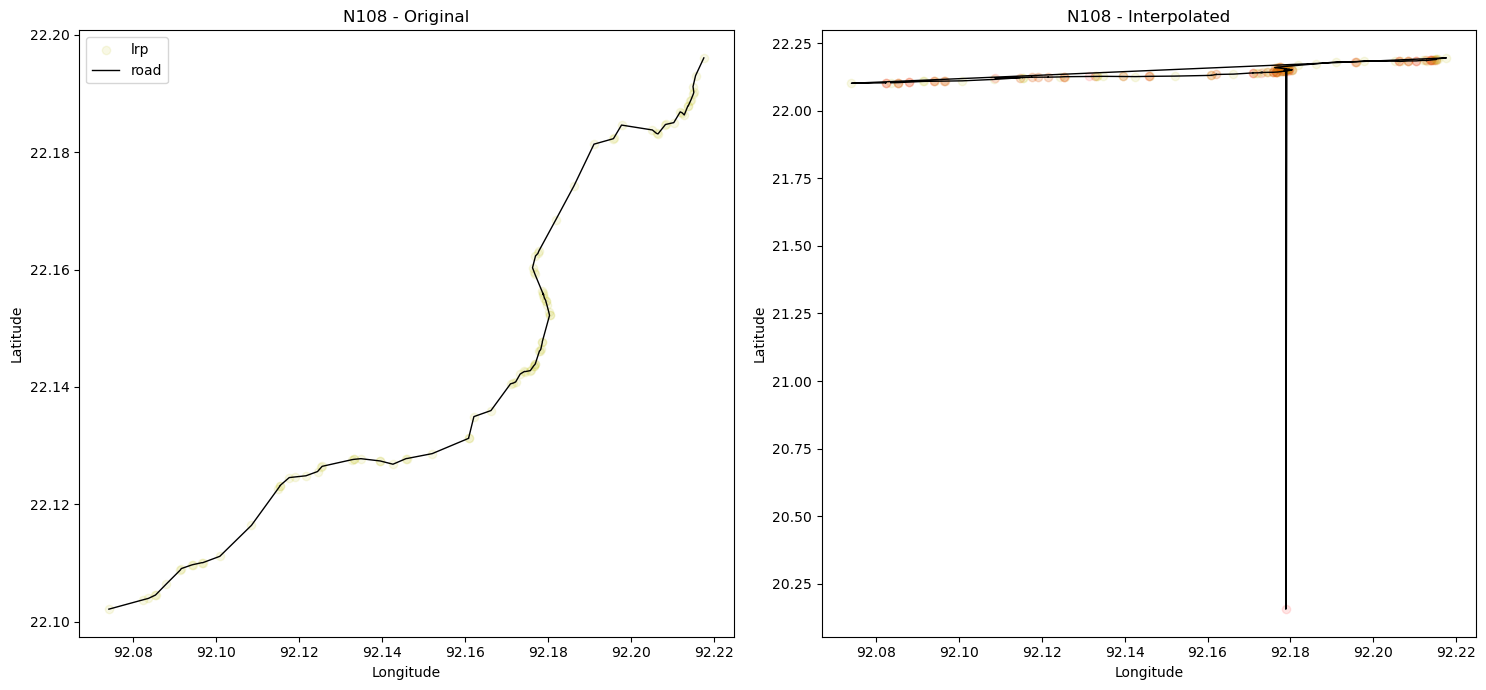

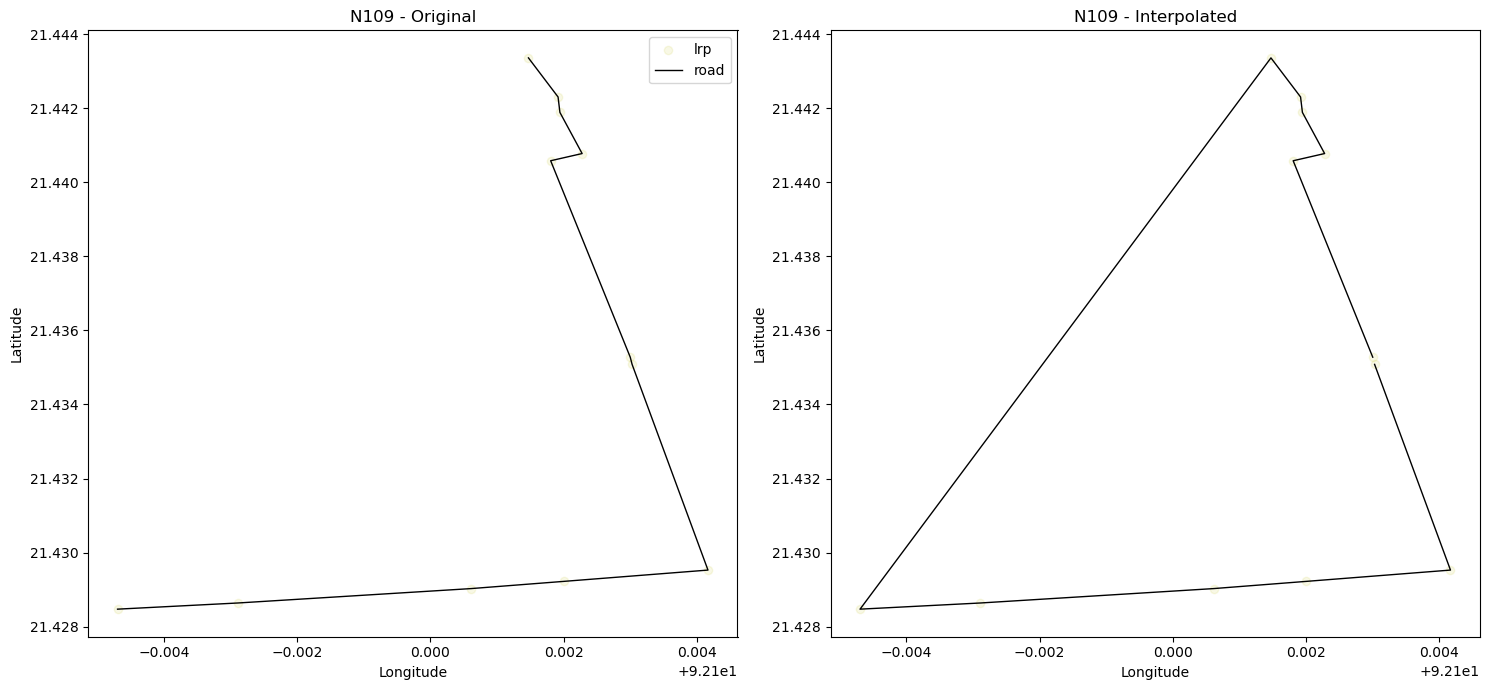

In [49]:
import matplotlib.pyplot as plt

# Define the roads variable
roads = df_roads_bridges_combined['road'].unique()

# Call function
for road in roads[:10]:
    plot_road_comparison(df_roadstransposed, df_roads_bridges_combined, road)

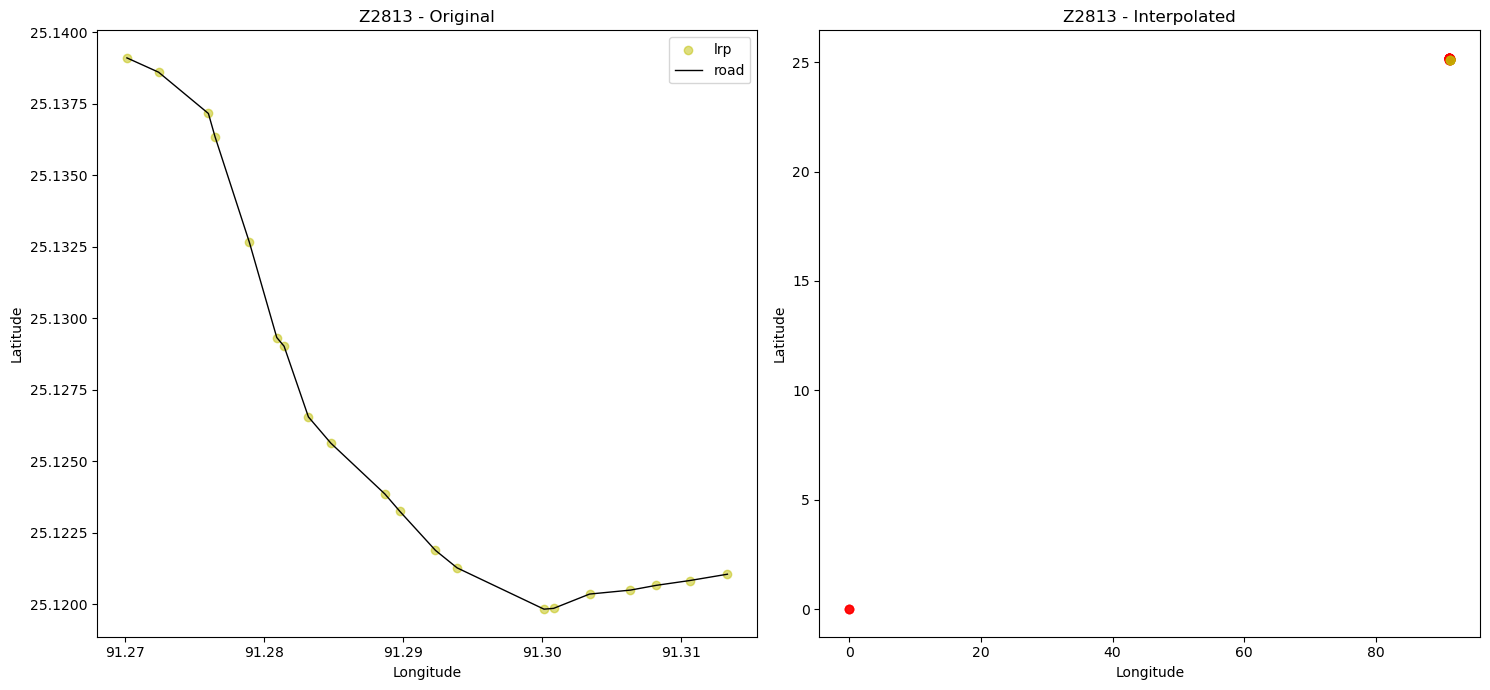

In [55]:
plot_road_comparison(df_roadstransposed, df_roads_bridges_combined, 'Z2813')

In [58]:
# print dupplicate rows (same road and lrp) in df_roads_bridges_combined
duplicates = df_roads_bridges_combined[df_roads_bridges_combined.duplicated(subset=['road', 'lrp'], keep=False)]
duplicates

,road,lrp,lat,lon,source
15,N1,LRP008b,23.704583,90.518833,NaN
52212,N1,LRP008b,23.704583,90.518833,df_overview
65630,N1,LRP008b,23.702083,90.515917,df_overview
19,N1,LRP010a,23.701528,90.528194,NaN
67608,N1,LRP010a,23.702056,90.528194,df_overview
...,...,...,...,...,...
67595,Z8943,LRP007a,22.428621,90.788543,df_overview
52208,Z8943,LRP008b,22.430249,90.774860,NaN
67596,Z8943,LRP008b,22.423333,90.805000,df_overview
67605,Z8948,LRP002a,NaN,NaN,df_overview


In [60]:
df_roads_bridges_combined[(df_roads_bridges_combined['road'] == 'N1') & (df_roads_bridges_combined['lrp'] == 'LRP018c')]

,road,lrp,lat,lon,source
52225,N1,LRP018c,23.649754,90.584549,df_overview
67614,N1,LRP018c,23.654000,90.577278,df_overview
67616,N1,LRP018c,23.654000,90.577278,df_overview


1. in bridge -- delete null and zero  (lat, lon) in bridge
2. in bridge -- delete duplicates (road, LRPName)
